In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, model_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB    
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('Train_dataset.xlsx')

In [3]:
df.head()


,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [4]:
df.drop(['Designation','Name','Married','Region','Insurance','salary'],axis=1,inplace=True)

In [5]:
df.shape

(10714, 22)

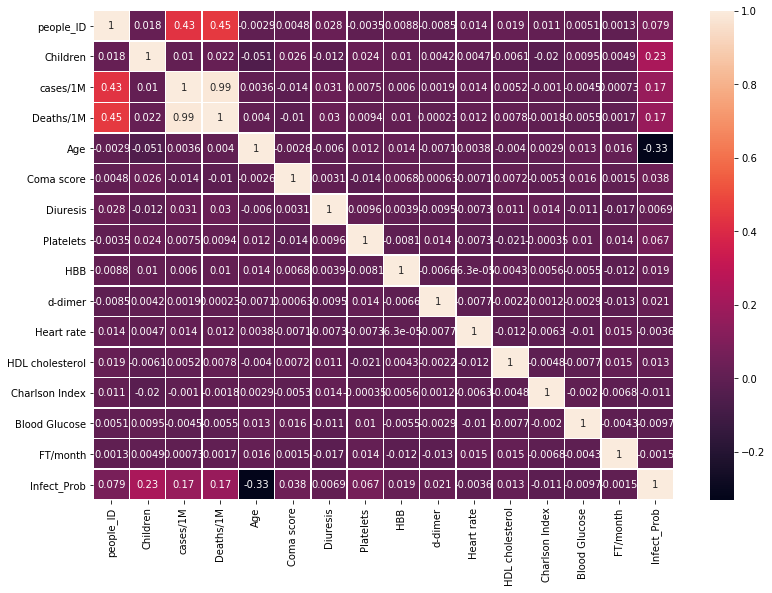

In [6]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(13,9))
sns.heatmap(df_corr, annot=True, linewidths=.5, ax=ax)


In [7]:
df.drop(['people_ID','Age','Gender'],axis=1,inplace=True)

In [8]:
df.shape

(10714, 19)

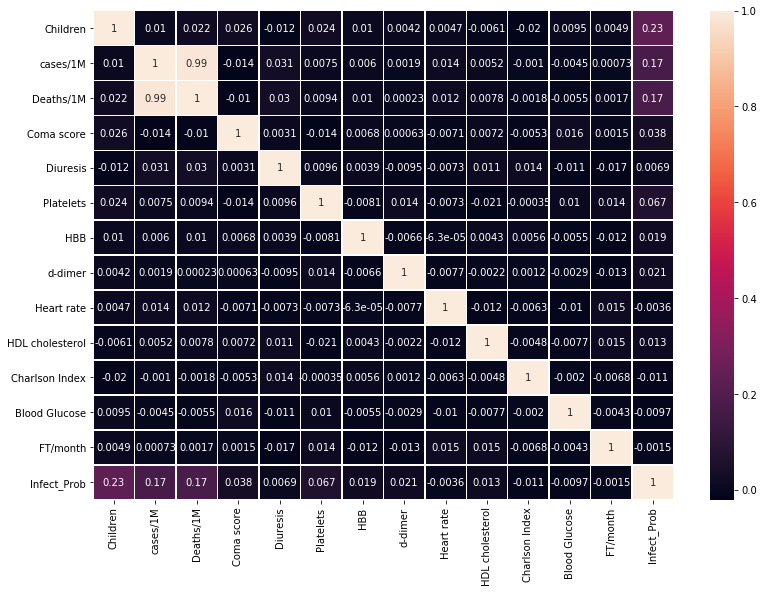

In [9]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(13,9))
sns.heatmap(df_corr, annot=True, linewidths=.5, ax=ax)

In [10]:
df.isna().sum()

Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [11]:
df['Children']=df['Children'].fillna(0)
mode1 = df['Children'].mode()
df['Children'].replace(0,mode1,inplace=True)

In [12]:
df['Diuresis']=df['Diuresis'].fillna(0)
mean1 = df['Diuresis'].mean()
df['Diuresis'].replace(0,mean1,inplace=True)

In [13]:
df['Platelets']=df['Platelets'].fillna(0)
mean1 = df['Platelets'].mean()
df['Platelets'].replace(0,mean1,inplace=True)

In [14]:
df['HBB']=df['HBB'].fillna(0)
mean1 = df['HBB'].mean()
df['HBB'].replace(0,mean1,inplace=True)

In [15]:
df['HDL cholesterol']=df['HDL cholesterol'].fillna(0)
mean1 = df['HDL cholesterol'].mean()
df['HDL cholesterol'].replace(0,mean1,inplace=True)

In [16]:
df['HDL cholesterol'].head()

0    58.0
1    68.0
2    43.0
3    60.0
4    64.0
Name: HDL cholesterol, dtype: float64

In [17]:
df.dropna(axis=0,inplace=True)
df['Occupation'].unique()

array(['Farmer', 'Cleaner', 'Driver', 'Manufacturing', 'Clerk',
       'Business', 'Sales', 'Researcher', 'Legal'], dtype=object)

In [18]:
labelencoder = LabelEncoder()
df['Occupation'] = labelencoder.fit_transform(df['Occupation'])

In [19]:
df.head()

,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
0,1.0,4,Public,2,0,Hypertension,8,<400,Normal,441.000000,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010
1,2.0,4,Walk,2,0,Diabetes,15,<100,Stage-02,260.174071,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880
2,1.0,1,Public,2,0,None,13,<300,Elevated,416.000000,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000
3,1.0,3,Car,2,0,Coronary Heart Disease,9,<200,Stage-01,410.000000,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225
4,2.0,6,Car,2,0,Diabetes,7,<400,Normal,390.000000,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800


In [20]:
labelencoder = LabelEncoder()
df['Mode_transport'] = labelencoder.fit_transform(df['Mode_transport'])

In [21]:
labelencoder = LabelEncoder()
df['comorbidity'] = labelencoder.fit_transform(df['comorbidity'])

In [22]:
labelencoder = LabelEncoder()
df['Pulmonary score'] = labelencoder.fit_transform(df['Pulmonary score'])

In [23]:
labelencoder = LabelEncoder()
df['cardiological pressure'] = labelencoder.fit_transform(df['cardiological pressure'])

In [24]:
df.head()

,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
0,1.0,4,1,2,0,2,8,3,1,441.000000,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010
1,2.0,4,2,2,0,1,15,0,3,260.174071,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880
2,1.0,1,1,2,0,3,13,2,0,416.000000,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000
3,1.0,3,0,2,0,0,9,1,2,410.000000,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225
4,2.0,6,0,2,0,1,7,3,1,390.000000,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800


In [25]:
train_set = df.iloc[:,0:-1].values
test_set = df.iloc[:,-1].values
train_set.shape

(7828, 18)

In [26]:
test_set.shape

(7828,)

In [27]:
X_train,X_test,Y_train, Y_test = train_test_split(train_set,test_set,test_size=0.2)

In [28]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6262, 18) (1566, 18) (6262,) (1566,)


In [29]:
Y_test

array([49.57023932, 48.46016988, 94.70304   , ..., 49.68843232,
       45.06616935, 48.64293947])

In [30]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
lreg = LinearRegression()

lreg.fit(X_train,Y_train)

y_pred1 = lreg.predict(X_test)

In [32]:
y_pred1

array([53.81469099, 53.93695801, 53.96903349, ..., 53.13530315,
       50.00522385, 48.41656534])

In [33]:
for i in range(0,len(X_test)):
    print(Y_test[i],y_pred1[i])

49.57023932 53.814690988741376
48.46016988 53.93695800942279
94.70304 53.96903349477227
36.12384 51.63918834655937
49.5730028 54.36332655314581
46.89109026 49.4737208445582
48.88103696 50.85114058417426
49.50746976 50.91475237459383
60.98827969 59.92562286166268
47.98718818 46.75727319640408
35.14752 55.94669538361316
44.44429171 44.20205318043526
47.26945665 51.05697593836332
48.79840799 50.58609375471618
48.86217252 49.34307168474207
47.97959297 50.2861943079273
46.34319718 47.26664515410772
52.893887 55.717213772582625
53.48364619 56.206590022162324
46.75024226 50.16605207807504
47.25537563 49.35501470730474
36.12384 52.57387893759026
48.20732716 51.16335001159371
47.13795086 51.14553925572727
47.50417641 47.921760025409874
45.75010802 45.854854416752815
47.5745864 50.45702006096162
47.06424563 46.933998631665105
49.53188672 51.82001198011715
49.35722864 54.725461638799786
86.89248 55.29861946175082
45.80529913 45.73992121620928
47.09774737 47.38784566618407
50.23538967 55.474185807

48.9673974 48.49190664718962
54.35557676 54.83222169602548
48.24776204 50.295585566787935
58.8554855 58.16664297242112
48.59312545 52.12856058373464
69.31872 49.27857384083131
45.80617036 48.09713692828274
49.52320867 54.124576066871995
46.2856087 47.856906627264735
72.24768 50.00810629188443
49.06800444 50.53075627936611
45.73184044 45.52727225497161
49.27106964 50.80265850591425
47.05692682 47.703288979565755
53.85816293 54.92217146257224
47.67476984 49.71701856359104
47.51064527 50.267621757650296
48.83390767 50.162272239134154
46.8820289 50.795945241475465
60.16489236 58.99192252252908
77.12928 50.65727731261828
52.15075116 54.07909800920747
47.83968 50.80737021606685
57.60171265 56.85506280999757
45.96952048 49.96828025966817
51.6624102 53.43244398613131
49.21181421 54.569466017108596
47.3937858 46.69759986801453
47.81192635 52.46928723311142
48.00497133 52.41726124284964
48.01134371 51.97655689688732
49.79978793 52.62888247450509
49.79232 54.43537874991445
46.74932097 46.61424586

59.98279799 58.71865470281634
53.90227923 55.10664962346144
89.82144 50.10855477835925
49.72410262 51.834464797683346
46.50329497 50.054667380357714
47.62392423 48.480443984649156
48.52678681 52.67592457356748
53.54239936 56.87525712300523
47.96442672 50.48484978840926
49.45899364 54.47441992840449
45.9381459 45.77043520563752
46.88020655 49.28541173191587
48.98557326 50.49712784353741
45.54139439 45.46409087097505
47.49451723 51.64007181182219
82.01088 49.35136872103364
50.04366748 54.761445175346985
49.14346486 51.65699602495657
71.27136 54.91714978101752
60.98016208 59.119514874894804
53.10595905 55.78814379067162
60.33192974 58.29457372904731
49.86694839 52.74380204946841
46.01146576 45.25525687222208
46.79243742 48.263102815154866
58.74619982 59.39193663365292
48.57529849 51.57379982529125
41.00544 52.811091193985206
58.96236313 57.24717281413031
41.00544 49.36608190127922
51.00201807 55.65052902854499
52.78077353 54.73693244846101
52.22314451 52.966466983284306
48.816 52.26656581

47.53371028 50.784976261970996
47.89052866 52.60043695636719
47.38293706 48.0886785854692
47.22227651 47.73562877347278
48.76758094 53.35622772520005
53.6976 57.487334491650664
48.52439812 49.928997662502844
80.05824 54.35271409277425
48.51138642 48.98448592799212
38.07648 51.735562790247336
50.82612932 54.97528818982444
46.22778965 48.98573698265723
50.42973874 55.32569785804909
46.1035945 46.32055182374495
60.5998454 60.19815422450212
47.79626493 48.147032944150766
49.54524056 54.7886678846299
47.79163643 50.13571668632481
87.8688 55.10347457246311
54.70168393 54.5919939070896
50.82841518 55.70166245840602
47.4640624 50.01928470911805
50.76864 55.336538268178785
49.00505594 54.001137103567764
45.93465753 49.03319340661346
50.91741414 55.66765871809974
71.27136 54.312812171310576
37.10016 59.794404990783946
45.35191059 47.46261619376715
45.07051845 44.91767064329844
47.35577953 45.90234723720811
86.89248 58.715904842559645
50.31500937 55.49099689859804
48.75000102 50.89708961206993
47

50.08787031 51.78509678830038
46.45060029 47.483109530734
47.37059675 47.08503938121251
53.90284943 55.990843946556375
46.28676924 49.64854766560042
47.2955603 50.60124658443734
48.95185868 52.07275321052808
46.49473748 51.81085549984612
50.76864 51.64601551412159
48.62607416 50.45900875371869
50.22487434 52.28385142122447
29.2896 55.67032009684997
53.06227322 54.864054808037686
45.94690906 47.693066819846706
47.02460522 50.06247539406887
49.42989221 55.06857720836449
50.6371856 54.674072732204486
57.60288 56.01783900853311
51.15162126 55.82186538884983
49.57611613 51.41743119693248
51.35305154 55.08158458350638
48.59346702 49.99319634277265
58.5792 45.797161245725235
48.12260638 52.31137900549347
48.816 57.74252360204696
48.74505282 50.44437998967177
47.52720437 49.33178909759967
45.88704 55.19408388633231
49.02823427 54.43170051075198
47.88562574 49.712071841700705
57.63691631 57.59053564510139
49.08507575 51.075237304927086
46.44093173 45.46298818252464
60.53184 51.92666204417237
47

In [34]:
#Verification and Accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred1))
print("R2-score: %.2f (RMSE):" , r2_score(Y_test, y_pred1) )

Mean Absolute Error: 5.590734457921124
Mean Squared Error: 100.19389313106461
R2-score: %.2f (RMSE): 0.11087450571007318


In [35]:
df1 = pd.read_excel("Test_dataset.xlsx")

In [36]:
df2 = df1[['Children','Occupation','Mode_transport','cases/1M','Deaths/1M','comorbidity','Coma score','Pulmonary score','cardiological pressure','Diuresis','Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','Charlson Index','Blood Glucose','FT/month']]


In [37]:
df2['Children']=df2['Children'].fillna(0)
mode1 = df2['Children'].mode()
df2['Children'].replace(0,mode1,inplace=True)

C:\Users\Pritish Dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pritish Dash\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [38]:
df2['Diuresis']=df2['Diuresis'].fillna(0)
mean1 = df2['Diuresis'].mean()
df2['Diuresis'].replace(0,mean1,inplace=True)

C:\Users\Pritish Dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df2['Platelets']=df2['Platelets'].fillna(0)
mean1 = df2['Platelets'].mean()
df2['Platelets'].replace(0,mean1,inplace=True)

C:\Users\Pritish Dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df2['HBB']=df2['HBB'].fillna(0)
mean1 = df2['HBB'].mean()
df2['HBB'].replace(0,mean1,inplace=True)

C:\Users\Pritish Dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df2['HDL cholesterol']=df2['HDL cholesterol'].fillna(0)
mean1 = df2['HDL cholesterol'].mean()
df2['HDL cholesterol'].replace(0,mean1,inplace=True)

C:\Users\Pritish Dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df2.dropna(axis=0,inplace=True)

C:\Users\Pritish Dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
labelencoder = LabelEncoder()
df2['Occupation'] = labelencoder.fit_transform(df2['Occupation'])
df2['Mode_transport'] = labelencoder.fit_transform(df2['Mode_transport'])
df2['comorbidity'] = labelencoder.fit_transform(df2['comorbidity'])
df2['Pulmonary score'] = labelencoder.fit_transform(df2['Pulmonary score'])
df2['cardiological pressure'] = labelencoder.fit_transform(df2['cardiological pressure'])

C:\Users\Pritish Dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Pritish Dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Pritish Dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [44]:
X_test = df2.iloc[:,:]
X_test = sc.transform(X_test)
y_pred2 = lreg.predict(X_test)

In [45]:
y_pred2.shape

(14498,)

In [46]:
#THE FINAL OUTPUT
Infect_df1 = DataFrame(df1.people_ID)
Infect_df1.columns = ['people_ID']

Infect_df2 = DataFrame(y_pred2)
Infect_df2.columns = ['Infect_Prob']

Infect_df = pd.concat([Infect_df1,Infect_df2], axis=1)
Infect_df

,people_ID,Infect_Prob
0,5942,56.761010
1,18664,57.052560
2,5603,55.296192
3,5649,55.724517
4,5099,56.174073
...,...,...
14493,23737,51.559625
14494,11171,50.405871
14495,23243,51.266712
14496,11199,50.593714


In [47]:
df['Infect_Level'] = np.zeros(len(df.Infect_Prob))

In [48]:
def infect(x):
    if (x > 0 and x <=20):
        return 0
    elif (x > 20 and x <=40):
        return 1
    elif (x > 40 and x <=60):
        return 2
    elif (x > 60 and x <=80):
        return 3
    else:
        return 4

df['Infect_Level'] = df['Infect_Prob'].apply(infect)

In [49]:
'''
Now let us test the Infection level COVID-19 with other classifier algorithms.
As done above, there are 5 levels of infection (0-4), which depends on Infect_Prob values.
The probablity has been equally divided into 5 levels for the sake of classification.
'''
ytrain = df[['Infect_Level']].values
Xtrain = df.iloc[:,0:-2].values
Xtest = df2.iloc[:,:]
X_train,X_test,Y_train, Y_test = train_test_split(Xtrain, ytrain,test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6262, 18) (1566, 18) (6262, 1) (1566, 1)


In [50]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,Y_train.ravel())

y_pred = logreg.predict(X_test)
y_predicted=logreg.predict(Xtest)


C:\Users\Pritish Dash\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
Infect_df1 = DataFrame(df1.people_ID)
Infect_df1.columns = ['people_ID']

Infect_df2 = DataFrame(y_predicted)
Infect_df2.columns = ['Infect_Prob']

Infect_df = pd.concat([Infect_df1,Infect_df2], axis=1)
Infect_df

,people_ID,Infect_Prob
0,5942,2
1,18664,2
2,5603,2
3,5649,2
4,5099,2
...,...,...
14493,23737,2
14494,11171,2
14495,23243,2
14496,11199,2


In [52]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8409961685823755


In [53]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
# Train the model using the training sets6
model.fit(X_train,Y_train.ravel())
y_predicted = model.predict(Xtest)
y_pred = model.predict(X_test)

In [54]:
Infect_df1 = DataFrame(df1.people_ID)
Infect_df1.columns = ['people_ID']

Infect_df2 = DataFrame(y_predicted)
Infect_df2.columns = ['Infect_Prob']

Infect_df = pd.concat([Infect_df1,Infect_df2], axis=1)
Infect_df

,people_ID,Infect_Prob
0,5942,2
1,18664,2
2,5603,2
3,5649,2
4,5099,2
...,...,...
14493,23737,2
14494,11171,2
14495,23243,2
14496,11199,2


In [55]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8537675606641124


In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train,Y_train.ravel())

#Predict the response for test dataset
y_predicted = knn.predict(Xtest)
y_pred = knn.predict(X_test)

In [57]:
Infect_df1 = DataFrame(df1.people_ID)
Infect_df1.columns = ['people_ID']

Infect_df2 = DataFrame(y_predicted)
Infect_df2.columns = ['Infect_Prob']

Infect_df = pd.concat([Infect_df1,Infect_df2], axis=1)
Infect_df

,people_ID,Infect_Prob
0,5942,2
1,18664,2
2,5603,2
3,5649,2
4,5099,2
...,...,...
14493,23737,2
14494,11171,2
14495,23243,2
14496,11199,2


In [58]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8167305236270753
